In [1]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install scipy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
import sys  
sys.path.insert(0, '/home/joao/Documents/scikit-learn/sklearn')

import sklearn

# Learning Rate = 1

## Housing Prices

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('housing.csv')
df = df.dropna()

y = df['median_house_value']
y = y.to_numpy()
X = df.drop('median_house_value', axis=1)
X['ocean_proximity'] = (X['ocean_proximity'].astype('category')).cat.codes
X = X.to_numpy()
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [43]:
params = {
    "n_estimators": 100,
    "max_depth": 4,
    "learning_rate": 1,
    "loss": "squared_error",
    "backfitting" : False,
    "subsample" : 1.0,
    "criterion" : "friedman_mse",
    "n_iter_no_change" : 10,
}

reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.7698874887732019

/home/joao/Documents/scikit-learn/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


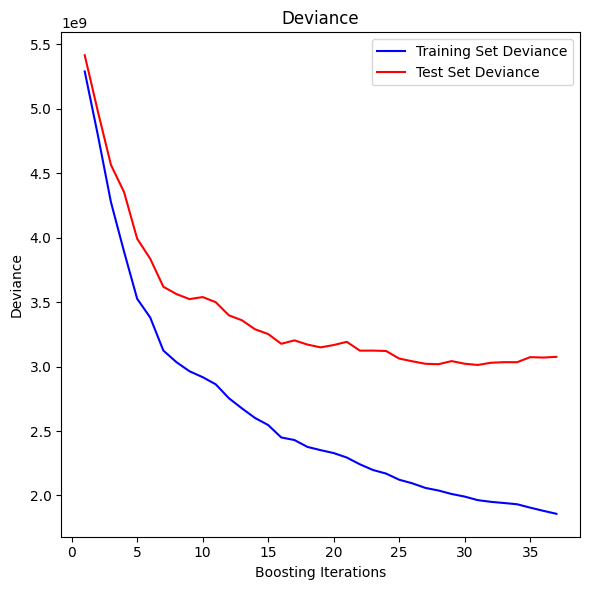

In [44]:
test_score = np.zeros((reg.n_estimators_,), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(reg.n_estimators_) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(reg.n_estimators_) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [31]:
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3861260021.3352


In [45]:
params = {
    "n_estimators": 100,
    "max_depth": 4,
    "learning_rate": 1,
    "loss": "squared_error",
    "backfitting" : True,
    "subsample" : 1.0,
    "max_backfit_iterations" : 100,
    "n_steps_backfit" : 100,
    "n_iter_no_change" : 10,
}

reg2 = GradientBoostingRegressor(**params)
reg2.fit(X_train, y_train)
reg2.predict(X_test[1:2])
reg2.score(X_test, y_test)

0.7866237656726887

/home/joao/Documents/scikit-learn/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


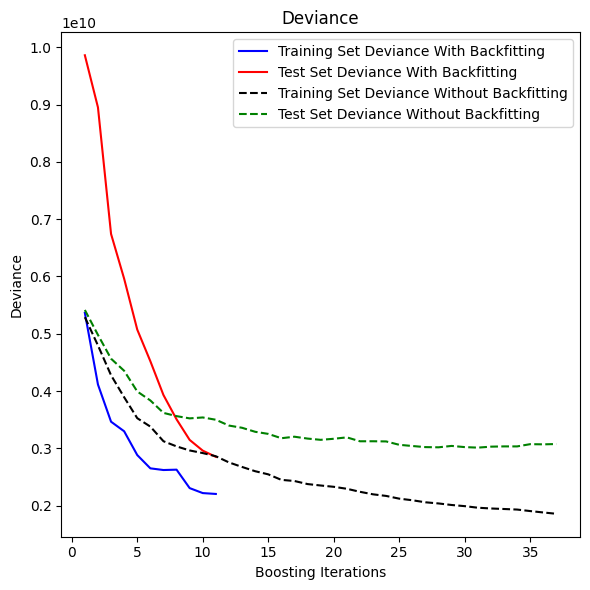

In [46]:
test_score2 = np.zeros((reg2.n_estimators_,), dtype=np.float64)
tmp = [i[np.max(np.nonzero(i))] for i in reg2.train_score_]


for i, y_pred in enumerate(reg2.staged_predict(X_test)):
    test_score2[i] = reg2.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")

plt.plot(
    np.arange(reg2.n_estimators_) + 1,
    tmp,
    "b-",
    label="Dados de Treinamento com Retroajuste",
)

plt.plot(
    np.arange(reg2.n_estimators_) + 1,
    test_score2,
    "r-",
    label="Dados de Validação com Retroajuste"
)

plt.plot(
    np.arange(reg.n_estimators_) + 1,
    reg.train_score_,
    "k--",
    label="Dados de Treinamento sem Retroajuste",
)
plt.plot(
    np.arange(reg.n_estimators_) + 1,
    test_score,
    "g--",
    label="Dados de Validação sem Retroajuste"
)

plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

## Melbourne Data

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('melb_data.csv')
df = df.dropna()

y = df['Price']
y = y.to_numpy()
X = df.drop(['Price','SellerG','Date'], axis=1)
X['Address'] = (X['Address'].astype('category')).cat.codes
X['Suburb'] = (X['Suburb'].astype('category')).cat.codes
X['Type'] = (X['Type'].astype('category')).cat.codes
X['Method'] = (X['Method'].astype('category')).cat.codes
X['CouncilArea'] = (X['CouncilArea'].astype('category')).cat.codes
X['Regionname'] = (X['Regionname'].astype('category')).cat.codes

X = X.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
params = {
    "n_estimators": 100,
    "max_depth": 4,
    "learning_rate": 1,
    "loss": "squared_error",
    "backfitting" : False,
    "subsample" : 1.0,
    "criterion" : "friedman_mse",
    "n_iter_no_change" : 10,
}

reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.6935310875872135

/home/joao/Documents/scikit-learn/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


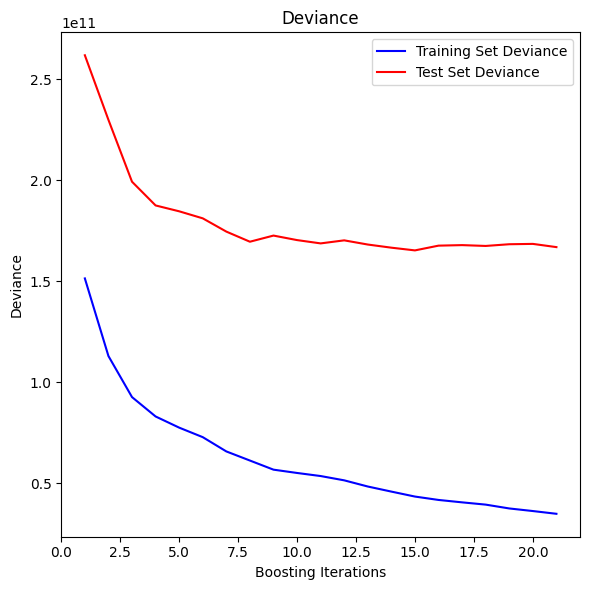

In [6]:
test_score = np.zeros((reg.n_estimators_,), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(reg.n_estimators_) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(reg.n_estimators_) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [7]:
params = {
    "n_estimators": 100,
    "max_depth": 4,
    "learning_rate": 1,
    "loss": "squared_error",
    "backfitting" : True,
    "max_backfit_iterations" : 100,
    "n_steps_backfit" : 100,
    "n_iter_no_change" : 10,
}

reg2 = GradientBoostingRegressor(**params)
reg2.fit(X_train, y_train)
reg2.predict(X_test[1:2])
reg2.score(X_test, y_test)

0.7353912238176563

/home/joao/Documents/scikit-learn/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


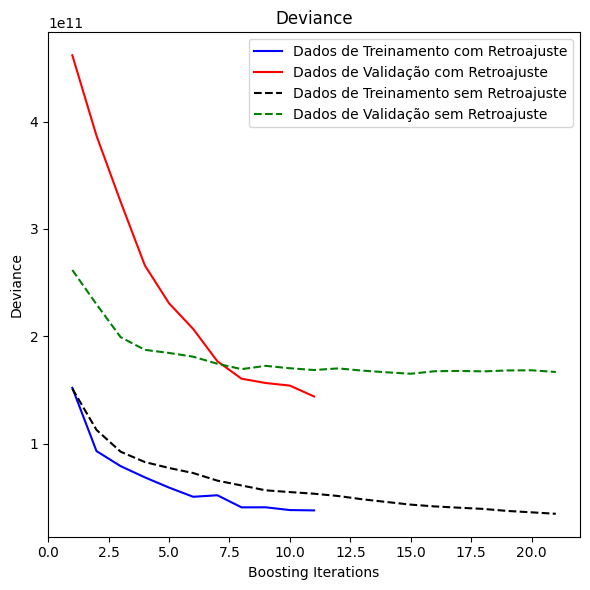

In [8]:
test_score2 = np.zeros((reg2.n_estimators_,), dtype=np.float64)
tmp = [i[np.max(np.nonzero(i))] for i in reg2.train_score_]


for i, y_pred in enumerate(reg2.staged_predict(X_test)):
    test_score2[i] = reg2.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")

plt.plot(
    np.arange(reg2.n_estimators_) + 1,
    tmp,
    "b-",
    label="Dados de Treinamento com Retroajuste",
)

plt.plot(
    np.arange(reg2.n_estimators_) + 1,
    test_score2,
    "r-",
    label="Dados de Validação com Retroajuste"
)

plt.plot(
    np.arange(reg.n_estimators_) + 1,
    reg.train_score_,
    "k--",
    label="Dados de Treinamento sem Retroajuste",
)
plt.plot(
    np.arange(reg.n_estimators_) + 1,
    test_score,
    "g--",
    label="Dados de Validação sem Retroajuste"
)

plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

## Diabetes

In [15]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
params = {
    "n_estimators": 100,
    "max_depth": 4,
    "learning_rate": 1,
    "loss": "squared_error",
    "backfitting" : False,
    "subsample" : 1.0,
    "criterion" : "friedman_mse",
    "n_iter_no_change" : 10,
}

reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

-0.49643791439828555

/home/joao/Documents/scikit-learn/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


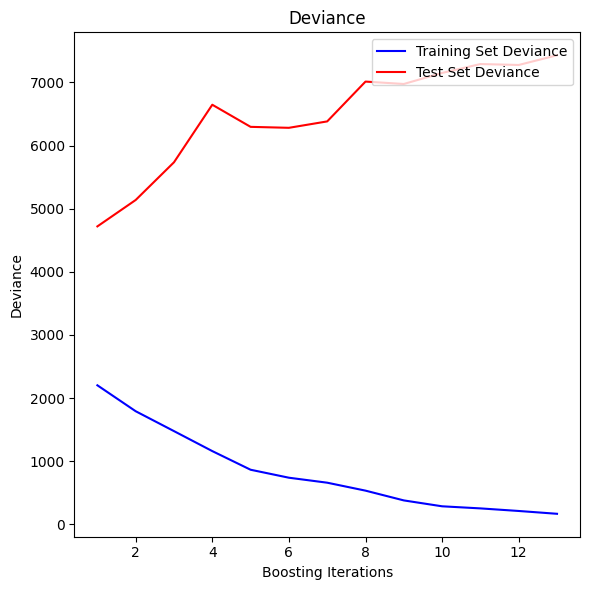

In [17]:
test_score = np.zeros((reg.n_estimators_,), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(reg.n_estimators_) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(reg.n_estimators_) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [18]:
params = {
    "n_estimators": 100,
    "max_depth": 4,
    "learning_rate": 1,
    "loss": "squared_error",
    "backfitting" : True,
    "max_backfit_iterations" : 100,
    "n_steps_backfit" : 100,
    "n_iter_no_change" : 10,
}

reg2 = GradientBoostingRegressor(**params)
reg2.fit(X_train, y_train)
reg2.predict(X_test[1:2])
reg2.score(X_test, y_test)

-0.9559923519427211

/home/joao/Documents/scikit-learn/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


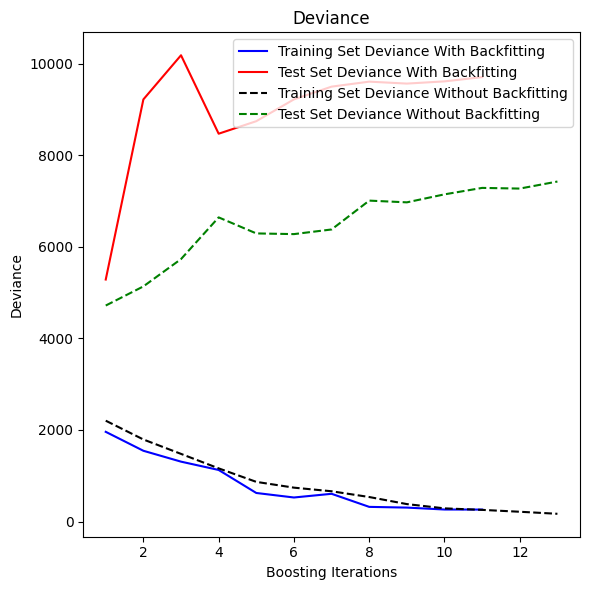

In [19]:
test_score2 = np.zeros((reg2.n_estimators_,), dtype=np.float64)
tmp = [i[np.max(np.nonzero(i))] for i in reg2.train_score_]


for i, y_pred in enumerate(reg2.staged_predict(X_test)):
    test_score2[i] = reg2.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")

plt.plot(
    np.arange(reg2.n_estimators_) + 1,
    tmp,
    "b-",
    label="Training Set Deviance With Backfitting",
)

plt.plot(
    np.arange(reg2.n_estimators_) + 1,
    test_score2,
    "r-",
    label="Test Set Deviance With Backfitting"
)

plt.plot(
    np.arange(reg.n_estimators_) + 1,
    reg.train_score_,
    "k--",
    label="Training Set Deviance Without Backfitting",
)
plt.plot(
    np.arange(reg.n_estimators_) + 1,
    test_score,
    "g--",
    label="Test Set Deviance Without Backfitting"
)

plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

# Análise 2

In [89]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

df = pd.read_csv('AirQualityUCI.csv')
df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=0)
df = df.dropna()

y = df['AH']
y = y.to_numpy()
X = df.drop('AH', axis=1)
X = X.to_numpy()

"""
n = 100

X = np.linspace(-1, 2.5, n).reshape((n, 1))
y_real = -X+X**2+2*X**3-X**4

y = y_real + np.random.rand(n, 1)
"""

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

KeyError: 'AH'

In [85]:
df = pd.read_csv('AirQualityUCI.csv', sep=";")

df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

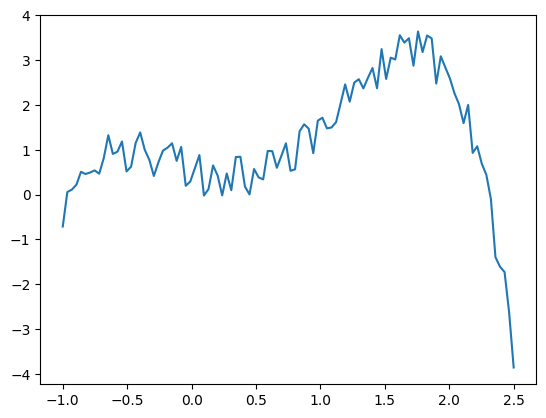

In [55]:
plt.plot(X, y)

In [77]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "backfitting" : False,
    "subsample" : 1.0,
    "criterion" : "friedman_mse",
    "n_iter_no_change" : 10,
}

reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

/home/joao/Documents/scikit-learn/sklearn/ensemble/_gb.py:549: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8867453225207286

In [78]:
reg.n_estimators_

500

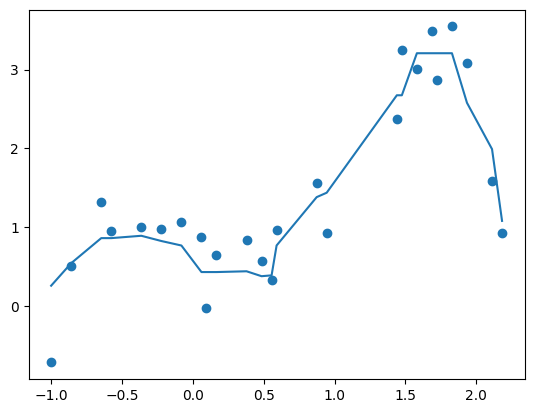

In [67]:
list1, list2 = (list(t) for t in zip(*sorted(zip(X_test, reg.predict(X_test)))))
plt.plot(list1, list2)
plt.scatter(X_test, y_test)

In [79]:
params = {
    "n_estimators": 100,
    "max_depth": 4,
    "learning_rate": 1,
    "loss": "squared_error",
    "backfitting" : False,
    "subsample" : 1.0,
    "criterion" : "friedman_mse",
    "n_iter_no_change" : 10,
    "backfitting" : True,
    "max_backfit_iterations" : 100,
    "n_steps_backfit" : 100
}

reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

/home/joao/Documents/scikit-learn/sklearn/ensemble/_gb.py:549: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8370573470681073

In [80]:
reg.n_estimators_

19

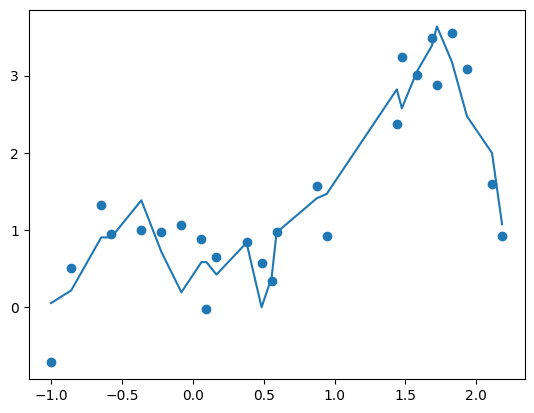

In [61]:
list1, list2 = (list(t) for t in zip(*sorted(zip(X_test, reg.predict(X_test)))))
plt.plot(list1, list2)
plt.scatter(X_test, y_test)

In [14]:
def output(X, ensemble, learning_rate = 1):
    return (np.sum(np.array([learning_rate*tree.predict(X) for tree in ensemble]), axis=0) if len(ensemble) != 0 else np.zeros(X.shape[0]))

n_trees = 50

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

params = {
    "n_estimators": 150,
    "max_depth": 8,
    "min_samples_split": 2,
    "learning_rate": 0.1,
    "loss": "squared_error",
    "backfitting" : False,
    "max_features" : None,
    "subsample" : 1.0,
    "criterion" : "friedman_mse",
    "min_samples_leaf" : 1,
    "min_weight_fraction_leaf" : 0.0,
    "min_impurity_decrease": 0.0,
    "ccp_alpha" : 0.0,
    "max_leaf_nodes": None
}

ensemble_1 = []
results_1 = []
results_tr_1 = []

for i in range(n_trees):
    tree = DecisionTreeRegressor(
        criterion=params["criterion"],
        splitter="best",
        max_depth=params["max_depth"],
        min_samples_split=params["min_samples_split"],
        min_samples_leaf=params["min_samples_leaf"],
        min_weight_fraction_leaf=params["min_weight_fraction_leaf"],
        min_impurity_decrease=params["min_impurity_decrease"],
        max_features=params["max_features"],
        max_leaf_nodes=params["max_leaf_nodes"],
        random_state=42,
        ccp_alpha=params["ccp_alpha"],
    )


    tree.fit(X_train, y_train-output(X_train, ensemble_1), check_input=False)
    ensemble_1.append(tree)
    
    results_1.append(r2_score(y_test, output(X_test, ensemble_1)))
    results_tr_1.append(r2_score(y_train, output(X_train, ensemble_1)))

In [17]:
ensemble = []
results = []
results_tr = []
all_iterations = []

for i in range(n_trees):
    tree = DecisionTreeRegressor(
        criterion=params["criterion"],
        splitter="best",
        max_depth=params["max_depth"],
        min_samples_split=params["min_samples_split"],
        min_samples_leaf=params["min_samples_leaf"],
        min_weight_fraction_leaf=params["min_weight_fraction_leaf"],
        min_impurity_decrease=params["min_impurity_decrease"],
        max_features=params["max_features"],
        max_leaf_nodes=params["max_leaf_nodes"],
        random_state=42,
        ccp_alpha=params["ccp_alpha"],
    )


    tree.fit(X_train, y_train-output(X_train, ensemble), check_input=False)

    ensemble.append(tree)
    count = 0
    
    if((i+1)%10 == 0):
        print(i)
        tmp_list = []
        for k in range(100):
            pre_loop_acc = r2_score(y_train, output(X_train, ensemble))
            
            for j, old_tree in enumerate(ensemble):
                tmp_ensemble = [tt for index, tt in enumerate(ensemble) if index != j]
                ensemble[j].fit(X_train, y_train-output(X_train, tmp_ensemble), check_input=False)
            
            tmp_list.append(r2_score(y_train, output(X_train, ensemble)))
            post_loop_acc = r2_score(y_train, output(X_train, ensemble))
            
            if(pre_loop_acc <= post_loop_acc):
                if(count >= 10):
                    count = 0
                    break
                count += 1
            else:
                count = 0
                
        all_iterations.append(tmp_list)
    
    results.append(r2_score(y_test, output(X_test, ensemble)))
    results_tr.append(r2_score(y_train, output(X_train, ensemble)))

9
19
29
39
49


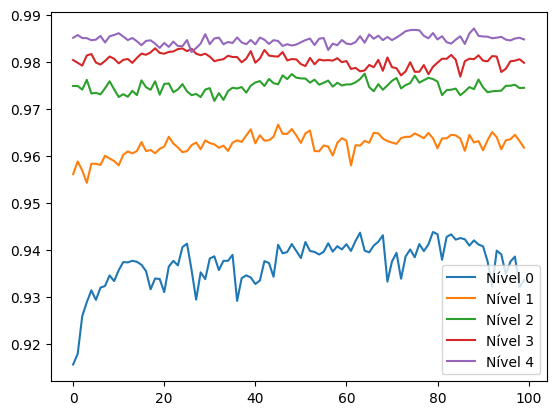

In [18]:
for i, j in enumerate(all_iterations):
    plt.plot(j, label="Nível {}".format(i))
    
plt.legend()

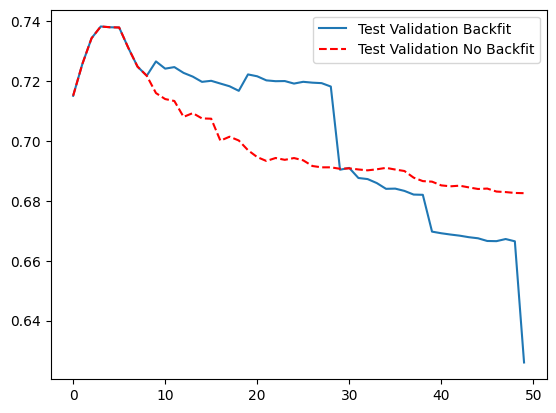

In [19]:
plt.plot(range(n_trees), results, label="Test Validation Backfit")
plt.plot(range(n_trees), results_1, 'r--', label="Test Validation No Backfit")

plt.legend()

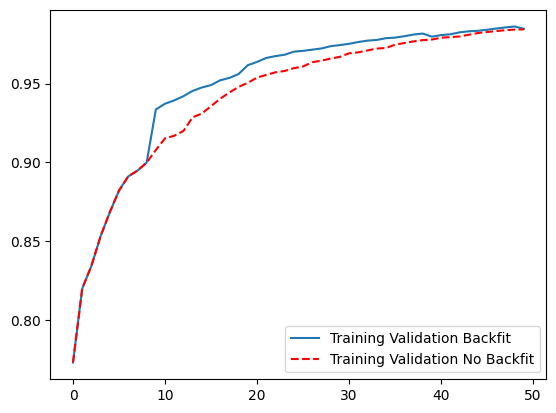

In [20]:
plt.plot(range(n_trees), results_tr, label="Training Validation Backfit")
plt.plot(range(n_trees), results_tr_1, 'r--', label="Training Validation No Backfit")

plt.legend()

# Teste de convergência com poucas árvores

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

params = {
    "max_depth": 8,
    "splitter" : "best",
    "min_samples_split": 2,
    "max_features" : None,
    "criterion" : "friedman_mse",
    "min_samples_leaf" : 1,
    "min_weight_fraction_leaf" : 0.0,
    "min_impurity_decrease": 0.0,
    "ccp_alpha" : 0.0,
    'random_state' : 42,
    "max_leaf_nodes": None
}

tree1 = DecisionTreeRegressor(
    criterion=params["criterion"],
    splitter="best",
    max_depth=params["max_depth"],
    min_samples_split=params["min_samples_split"],
    min_samples_leaf=params["min_samples_leaf"],
    min_weight_fraction_leaf=params["min_weight_fraction_leaf"],
    min_impurity_decrease=params["min_impurity_decrease"],
    max_features=params["max_features"],
    max_leaf_nodes=params["max_leaf_nodes"],

    ccp_alpha=params["ccp_alpha"],
)

tree2 = DecisionTreeRegressor(
    criterion=params["criterion"],
    splitter="best",
    max_depth=params["max_depth"],
    min_samples_split=params["min_samples_split"],
    min_samples_leaf=params["min_samples_leaf"],
    min_weight_fraction_leaf=params["min_weight_fraction_leaf"],
    min_impurity_decrease=params["min_impurity_decrease"],
    max_features=params["max_features"],
    max_leaf_nodes=params["max_leaf_nodes"],
    random_state=42,
    ccp_alpha=params["ccp_alpha"],
)

tree3 = DecisionTreeRegressor(
    criterion=params["criterion"],
    splitter="best",
    max_depth=params["max_depth"],
    min_samples_split=params["min_samples_split"],
    min_samples_leaf=params["min_samples_leaf"],
    min_weight_fraction_leaf=params["min_weight_fraction_leaf"],
    min_impurity_decrease=params["min_impurity_decrease"],
    max_features=params["max_features"],
    max_leaf_nodes=params["max_leaf_nodes"],
    random_state=42,
    ccp_alpha=params["ccp_alpha"],
)

n = 500
tree1_train = []
tree1_test = []
tree2_train = []
tree2_test = []
overall_test = []
overall_train = []

tree1.fit(X_train, y_train, check_input=False)
tree1_test.append(tree1.score(X_test, y_test))
tree1_train.append(tree1.score(X_train, y_train))

tree2.fit(X_train, y_train-tree1.predict(X_train), check_input=False)
tree2_test.append(tree2.score(X_test, y_test-tree1.predict(X_test)))
tree2_train.append(tree2.score(X_train, y_train-tree1.predict(X_train)))


for i in range(n):
    tree1.fit(X_train, y_train-tree2.predict(X_train))
    tree1_test.append(tree1.score(X_test, y_test-tree2.predict(X_test)))
    tree1_train.append(tree1.score(X_train, y_train-tree2.predict(X_train)))

    tree2.fit(X_train, y_train-tree1.predict(X_train))
    tree2_test.append(tree2.score(X_test, y_test-tree1.predict(X_test)))
    tree2_train.append(tree2.score(X_train, y_train-tree1.predict(X_train)))
    
    overall_test.append(r2_score(
        y_test,
        tree1.predict(X_test)+tree2.predict(X_test)
    ))
    overall_train.append(r2_score(
        y_train,
        tree1.predict(X_train)+tree2.predict(X_train)
    ))

In [ ]:
plt.plot(range(n+1), tree1_train, label='Árvore 1 Treinamento')
plt.plot(range(n+1), tree1_test, label='Árvore 1 Testes')
plt.plot(range(n+1), tree2_train, 'k--', label='Árvore 2 Treinamento')
plt.plot(range(n+1), tree2_test, 'g--', label='Árvore 2 Teste')

plt.legend()

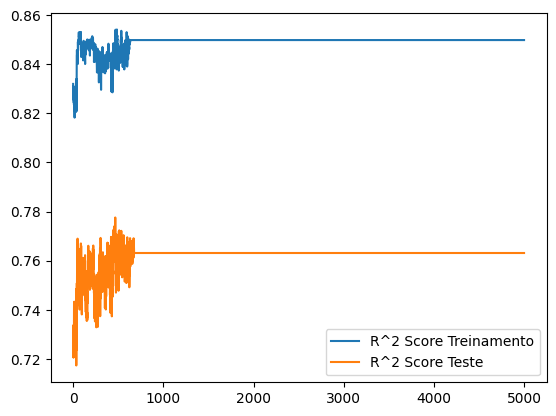

In [7]:
plt.plot(range(n), overall_train, label='R^2 Score Treinamento')
plt.plot(range(n), overall_test, label='R^2 Score Teste')
plt.legend()